In [41]:
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [42]:
df = pd.DataFrame()
for data in Path('./wandb_runs/').glob('*.csv'):
    tmp_df = pd.read_csv(data)
    tmp_df['data_name'] = data.name.split('.')[0]
    tmp_df['dataset'] = data.name.split('.')[0].split('_')[0]
    tmp_df['data_version'] = data.name.split('.')[0].split('_')[1]
    tmp_df[''] = data.name.split('.')[0]
    df = pd.concat([df, tmp_df], ignore_index=True)
df = df[df['val_acc_epoch'].notna()]
df.shape

(300, 35)

In [111]:
map_values = {True : "tak", False: "nie"}
df['batch_norm'] =  df['batch_norm'].map(map_values)

In [113]:
important_columns = ['Name', 'batch_norm', 'batch_size', 'dropout', 'lr', 'negative_slope', 'epoch','train_acc_epoch', 'train_loss_epoch', 'trainer/global_step', 'val_acc_epoch','val_loss_epoch','data_name', 'dataset','data_version']

In [114]:
df.groupby(['data_name']).size()

data_name
BFD_enc     50
BFD_gray    50
BFD_rgb     50
PPD_enc     50
PPD_gray    50
PPD_rgb     50
dtype: int64

In [115]:
hyperparameters = ['batch_norm', 'batch_size', 'dropout', 'lr', 'negative_slope']
for hyperparameter in hyperparameters:
    print(df.groupby([hyperparameter]).size())
    print()

batch_norm
nie    149
tak    151
dtype: int64

batch_size
2      46
4      41
8      42
16     52
32     44
64     48
128    27
dtype: int64

dropout
0.0    67
0.1    72
0.2    56
0.3    53
0.4    52
dtype: int64

lr
0.000005    33
0.000010    42
0.000050    29
0.000100    41
0.000500    37
0.001000    42
0.005000    45
0.010000    31
dtype: int64

negative_slope
0.00    70
0.01    53
0.02    64
0.05    55
0.10    58
dtype: int64



# Batch normalization

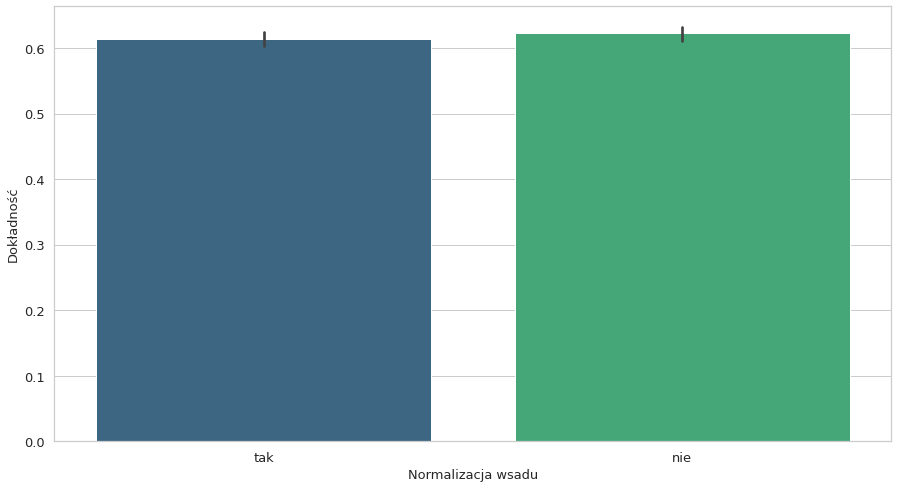

In [117]:
labels_font_size = 13
plt.figure(figsize=(15,8))
ax = sns.barplot(x="batch_norm", y="val_acc_epoch", data=df, palette="viridis")
plt.xlabel("Normalizacja wsadu", fontsize=labels_font_size)
plt.ylabel("Dokładność", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size);
# plt.title('Średnia dokładność na zbiorach walidacyjnych a normalizacja wsadu', fontdict={'fontsize':20});

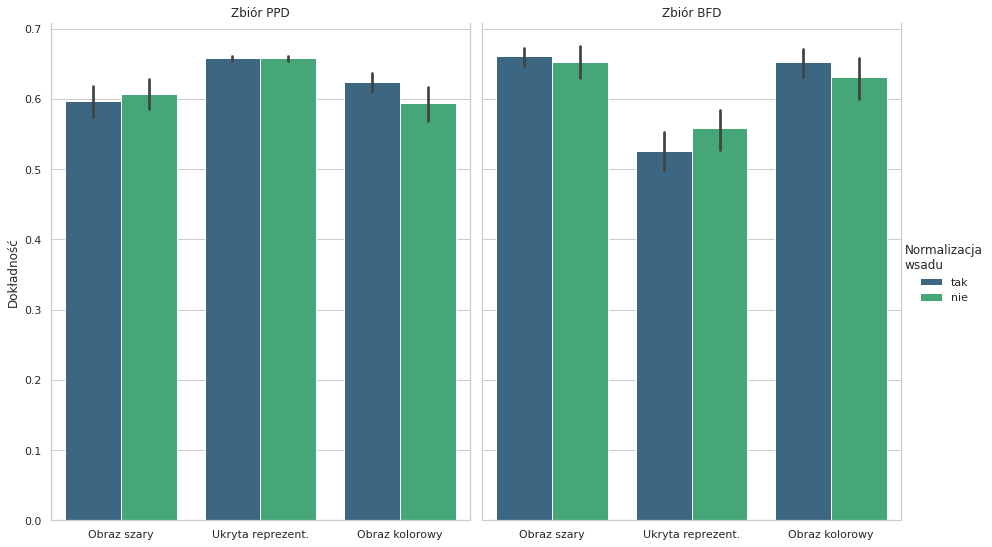

In [146]:
g = sns.catplot(x = "data_version", 
                 y = "val_acc_epoch",
                 hue = "batch_norm", 
                 col = "dataset", 
                 data = df, 
                 kind = "bar",
                 palette="viridis",
                 height=8, aspect=.8);


(g.set_axis_labels("", "Dokładność")
  .set_xticklabels(["Obraz szary", "Ukryta reprezent.", "Obraz kolorowy"])
  .set_titles("Zbiór {col_name}")
  .despine(left=False, right=False)
  ._legend.set_title('Normalizacja\nwsadu'));

# new_labels = ['tak', 'nie']
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)

# Funkcja aktywacji

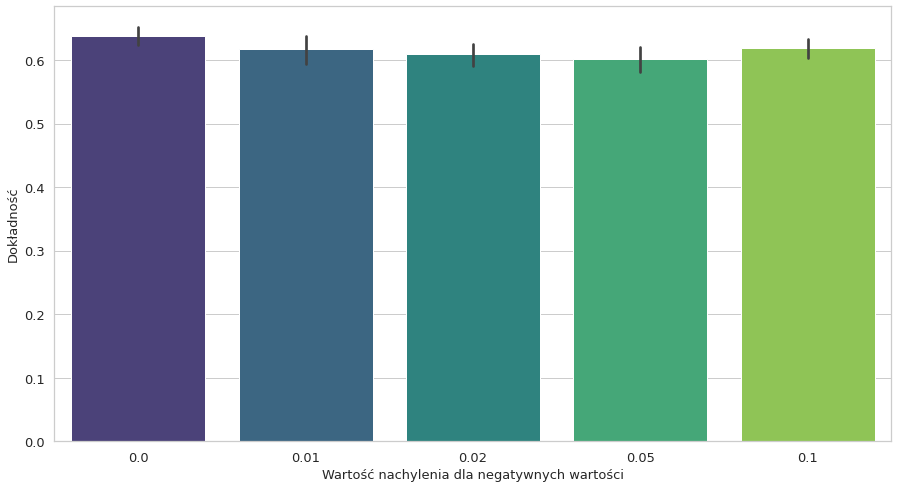

In [120]:
labels_font_size = 13
plt.figure(figsize=(15,8))
ax = sns.barplot(x="negative_slope", y="val_acc_epoch", data=df, palette="viridis")
plt.xlabel("Wartość nachylenia dla negatywnych wartości", fontsize=labels_font_size)
plt.ylabel("Dokładność", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size);

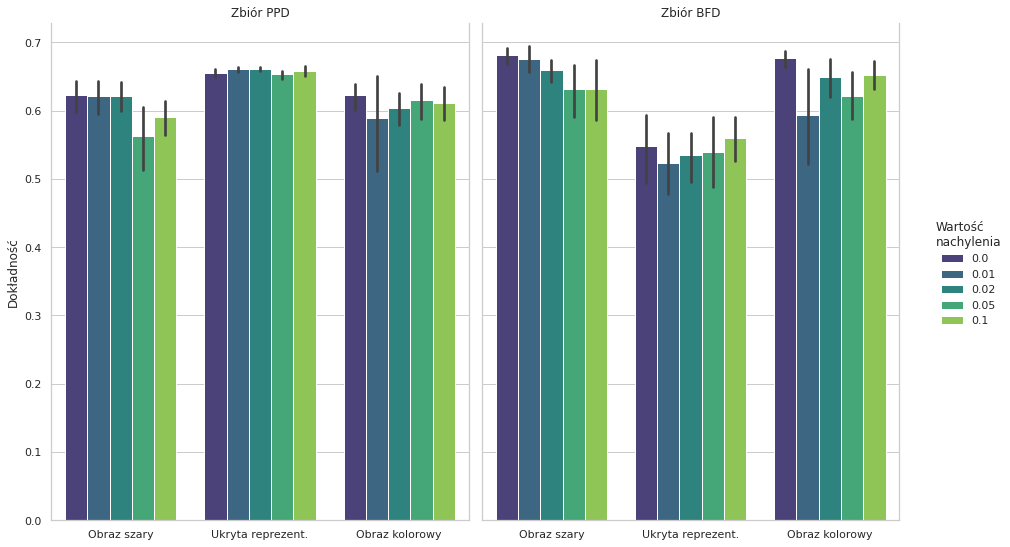

In [147]:
g = sns.catplot(x = "data_version", 
                 y = "val_acc_epoch",
                 hue = "negative_slope", 
                 col = "dataset", 
                 data = df, 
                 kind = "bar",
                 palette="viridis",
                 height=8, aspect=.8);


(g.set_axis_labels("", "Dokładność")
  .set_xticklabels(["Obraz szary", "Ukryta reprezent.", "Obraz kolorowy"])
  .set_titles("Zbiór {col_name}")
  .despine(left=False, right=False)
  ._legend.set_title('Wartość\nnachylenia'));

# Dropout

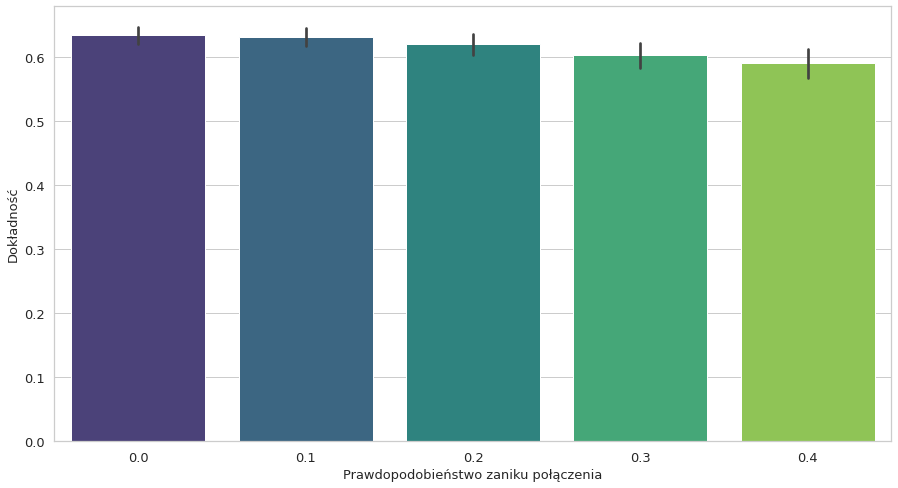

In [128]:
labels_font_size = 13
plt.figure(figsize=(15,8))
ax = sns.barplot(x="dropout", y="val_acc_epoch", data=df, palette="viridis")
plt.xlabel("Prawdopodobieństwo zaniku połączenia", fontsize=labels_font_size)
plt.ylabel("Dokładność", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size);

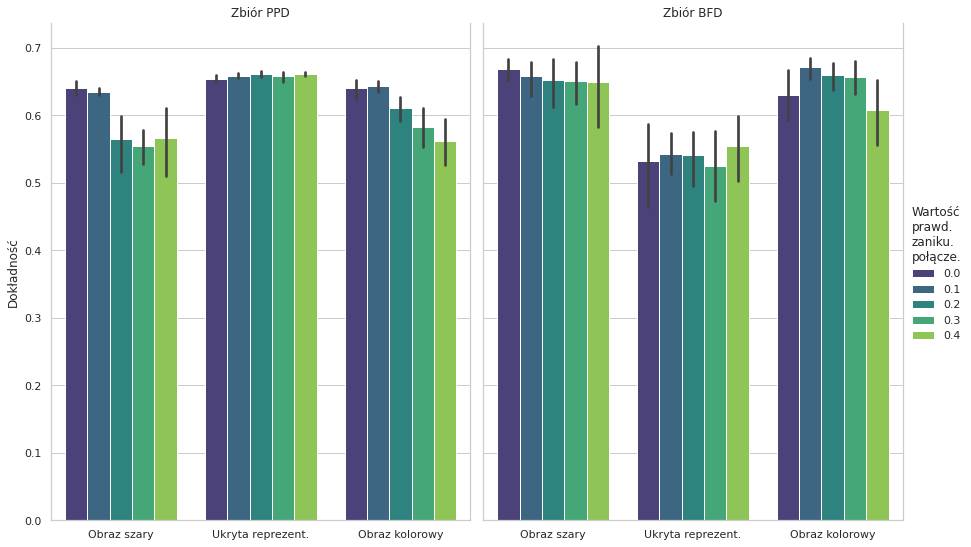

In [148]:
g = sns.catplot(x = "data_version", 
                 y = "val_acc_epoch",
                 hue = "dropout", 
                 col = "dataset", 
                 data = df, 
                 kind = "bar",
                 palette="viridis",
                 height=8, aspect=.8);


(g.set_axis_labels("", "Dokładność")
  .set_xticklabels(["Obraz szary", "Ukryta reprezent.", "Obraz kolorowy"])
  .set_titles("Zbiór {col_name}")
  .despine(left=False, right=False)
  ._legend.set_title('Wartość\nprawd.\nzaniku.\npołącze.'));

# LR

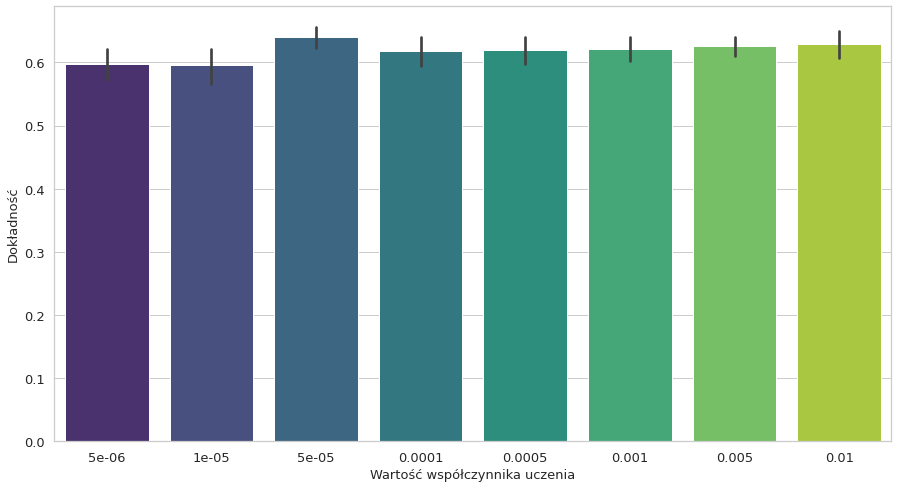

In [135]:
labels_font_size = 13
plt.figure(figsize=(15,8))
ax = sns.barplot(x="lr", y="val_acc_epoch", data=df, palette="viridis")
plt.xlabel("Wartość współczynnika uczenia", fontsize=labels_font_size)
plt.ylabel("Dokładność", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size);

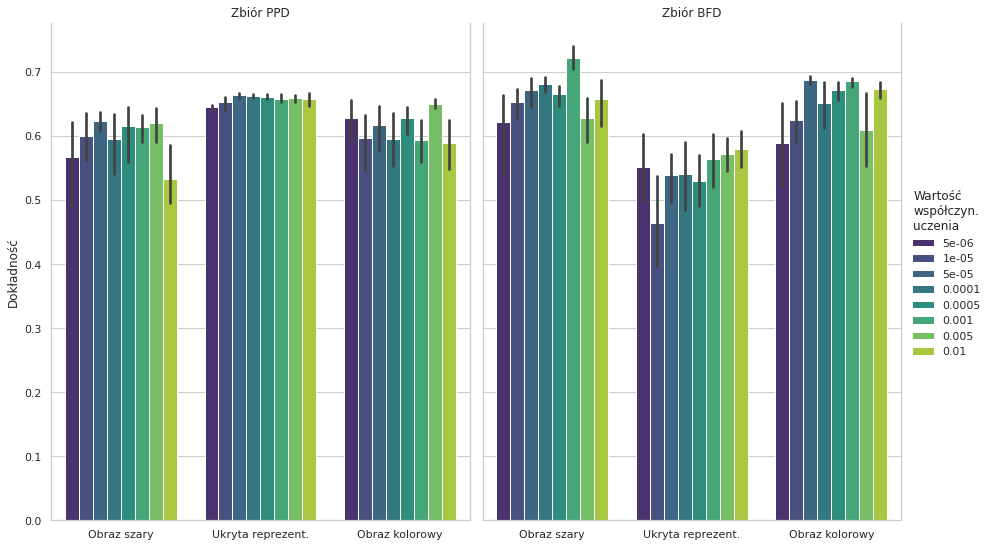

In [149]:
g = sns.catplot(x = "data_version", 
                 y = "val_acc_epoch",
                 hue = "lr", 
                 col = "dataset", 
                 data = df, 
                 kind = "bar",
                 palette="viridis",
                 height=8, aspect=.8);


(g.set_axis_labels("", "Dokładność")
  .set_xticklabels(["Obraz szary", "Ukryta reprezent.", "Obraz kolorowy"])
  .set_titles("Zbiór {col_name}")
  .despine(left=False, right=False)
  ._legend.set_title('Wartość\nwspółczyn.\nuczenia'));

# Batch size

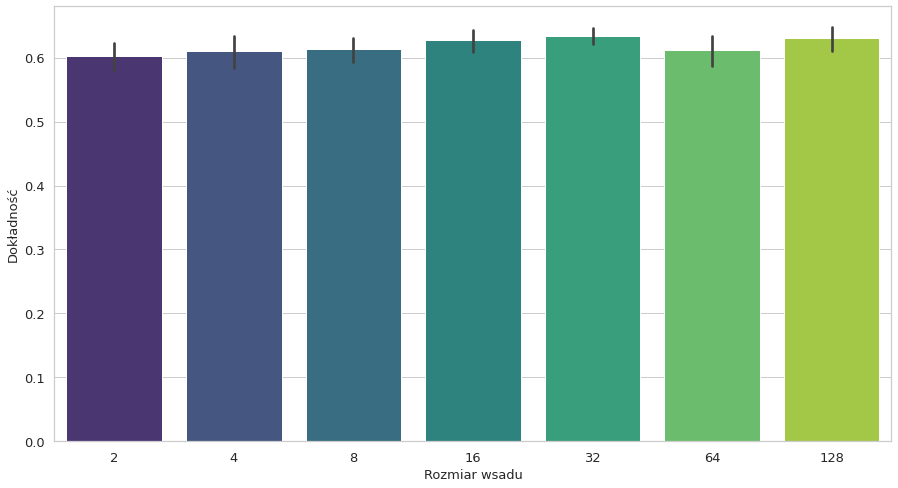

In [140]:
labels_font_size = 13
plt.figure(figsize=(15,8))
ax = sns.barplot(x="batch_size", y="val_acc_epoch", data=df, palette="viridis")
plt.xlabel("Rozmiar wsadu", fontsize=labels_font_size)
plt.ylabel("Dokładność", fontsize=labels_font_size)
plt.xticks(fontsize=labels_font_size) #rotation=10
plt.yticks(fontsize=labels_font_size);

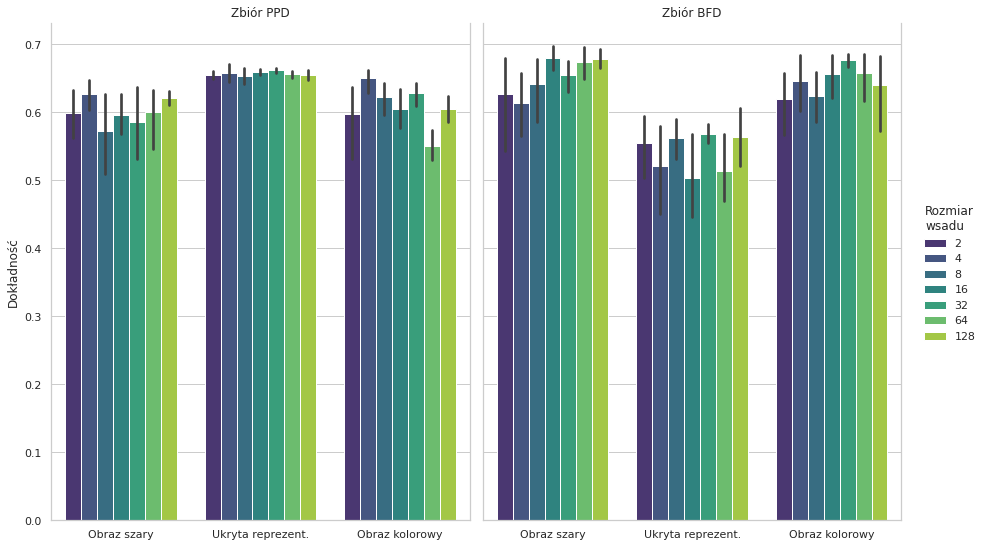

In [150]:
g = sns.catplot(x = "data_version", 
                 y = "val_acc_epoch",
                 hue = "batch_size", 
                 col = "dataset", 
                 data = df, 
                 kind = "bar",
                 palette="viridis",
                 height=8, aspect=.8);


(g.set_axis_labels("", "Dokładność")
  .set_xticklabels(["Obraz szary", "Ukryta reprezent.", "Obraz kolorowy"])
  .set_titles("Zbiór {col_name}")
  .despine(left=False, right=False)
  ._legend.set_title('Rozmiar\nwsadu'));